In [1]:
#未使用open作为输入
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tushare as ts
import datetime

In [2]:
HIDDEN_SIZE=10   #h维度
INPUT_SIZE=8    #输入维度
OUTPUT_SIZE=1   #输出维度
LR=0.0001        #学习率

In [3]:
#获取上证指数从20120101至今的行情数据
def get_sh000001():
    now=datetime.datetime.now().strftime('%Y%m%d')
    api = ts.pro_api('8880894ba35f78a3f6030974566db30a32c88e8631e33f363cee6f8a')
    data = ts.pro_bar(pro_api=api, ts_code='000001.SH', asset='I', start_date='20120101', end_date=now)
    cols = list(data)
    
    #开盘价放在前边,行情按时间从早到晚重新排列
    cols.insert(2,cols.pop(cols.index('open')))
    data=data.ix[:,cols].iloc[::-1,:]
    return data

In [4]:
ALL_DATA=get_sh000001()
DATA=ALL_DATA.iloc[:,2:11].values  #取第2-11列
ALL_DATA

D:\program\anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


,ts_code,trade_date,open,close,high,low,pre_close,change,pct_change,vol,amount
1670,000001.SH,20120104,2211.9950,2169.3900,2217.5200,2168.6440,2199.4170,-30.0270,-1.3652,49245537.0,4.063292e+07
1669,000001.SH,20120105,2160.8980,2148.4520,2183.4040,2145.5560,2169.3900,-20.9380,-0.9652,58743447.0,4.660397e+07
1668,000001.SH,20120106,2148.1470,2163.3950,2164.3220,2132.6260,2148.4520,14.9430,0.6955,50583054.0,3.946587e+07
1667,000001.SH,20120109,2164.7410,2225.8900,2226.2180,2148.4530,2163.3950,62.4950,2.8887,76759839.0,6.213296e+07
1666,000001.SH,20120110,2221.8320,2285.7440,2288.6280,2218.2750,2225.8900,59.8540,2.6890,109585415.0,9.104590e+07
1665,000001.SH,20120111,2282.9130,2276.0460,2290.6440,2265.1850,2285.7440,-9.6980,-0.4243,84441781.0,7.426471e+07
1664,000001.SH,20120112,2268.7390,2275.0100,2295.2240,2265.2560,2276.0460,-1.0360,-0.0455,71569994.0,6.394588e+07
1663,000001.SH,20120113,2277.0800,2244.5800,2281.5320,2225.7360,2275.0100,-30.4300,-1.3376,71474322.0,6.403003e+07
1662,000001.SH,20120116,2230.4330,2206.1930,2241.2590,2206.0450,2244.5800,-38.3870,-1.7102,45859522.0,4.288479e+07
1661,000001.SH,20120117,2206.5310,2298.3760,2298.3760,2196.1170,2206.1930,92.1830,4.1784,87803560.0,7.740685e+07


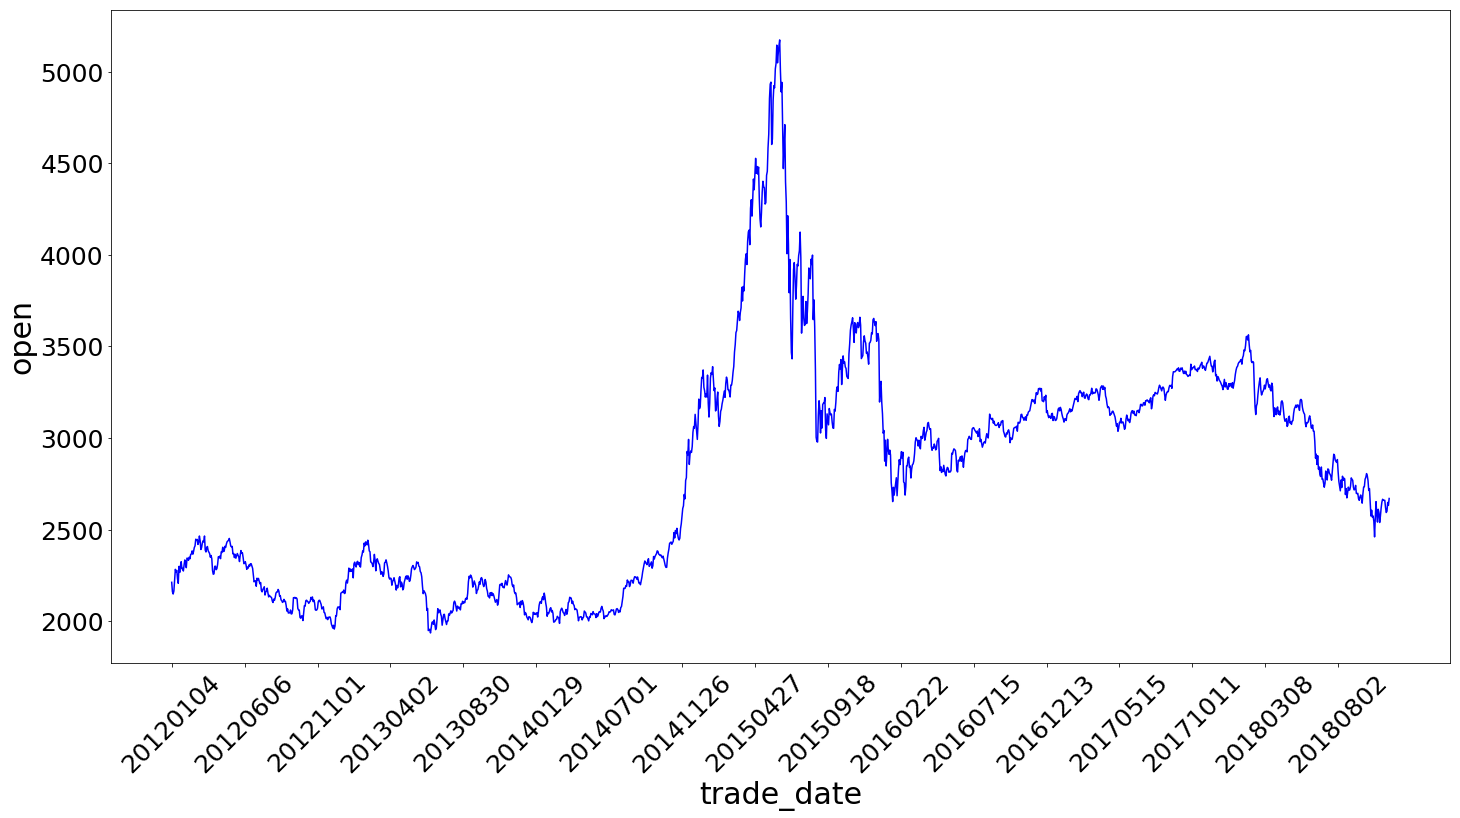

In [5]:
plt.figure(figsize=(24, 12))
plt.plot(range(ALL_DATA.shape[0]),ALL_DATA.iloc[:,2],color='b')
plt.xticks(range(0,ALL_DATA.shape[0],100),ALL_DATA['trade_date'].loc[::100],rotation=45,fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('trade_date',fontsize=30)
plt.ylabel('open',fontsize=30)
plt.show()

In [6]:
def get_train_data(data,batch_size,time_step,train_begin,train_end):
    batch_index=[]
    data_train=data[train_begin:train_end]
    #去量纲，标准化
    normalized_train_data=(data_train-np.mean(data_train,axis=0))/np.std(data_train,axis=0)  
    train_x,train_y=[],[]
    
    for i in range(len(normalized_train_data)-time_step-1):
        if i % batch_size==0:
            #每个batch还是的索引加入batch_index
            batch_index.append(i) 
        #x和y每个样本间的间时间隔为1，y为x下一个交易日的开盘价
        x=normalized_train_data[i:i+time_step,1:9]  
        y=normalized_train_data[i+1:i+1+time_step,0,np.newaxis]
        #训练样本个数为len(normalized_train_data)-time_step，分为了batch_size个batch
        train_x.append(x.tolist())
        train_y.append(y.tolist())
    batch_index.append((len(normalized_train_data)-time_step-1))
    return batch_index,train_x,train_y

In [7]:
def get_test_data(data,time_step,test_begin):
    data_test=data[test_begin:]
    mean=np.mean(data_test,axis=0)
    std=np.std(data_test,axis=0)
    normalized_test_data=(data_test-mean)/std
    #确保最后一个batch正好是time_step的长度
    size=(len(normalized_test_data)+time_step-1)//time_step  #有size个sample 
    test_x,test_y=[],[]  
    #x和y每个样本间的时间隔为time_step，将测试数据切割为大小为time_step的时间片，y为x下一个交易日的开盘价
    for i in range(size-1): 
        x=normalized_test_data[i*time_step:(i+1)*time_step,1:9] 
        y=normalized_test_data[i*time_step+1:(i+1)*time_step+1,0]  
        test_x.append(x.tolist())
        test_y.extend(y)
    #最后一个时间片的处理    
    if (i+1)*time_step+1 <= len(normalized_test_data):
        test_x.append((normalized_test_data[i*time_step:,1:9]).tolist())
        test_y.extend((normalized_test_data[i*time_step+1:,0]).tolist())
    return mean,std,test_x,test_y

In [8]:
#神经网络、输出层权重、偏置
MY_WEIGHTS={
         'in':tf.Variable(tf.random_normal([INPUT_SIZE,HIDDEN_SIZE])),
         'out':tf.Variable(tf.random_normal([HIDDEN_SIZE,1]))
        }
MY_BIASES={
        'in':tf.Variable(tf.constant(0.1,shape=[HIDDEN_SIZE,])),
        'out':tf.Variable(tf.constant(0.1,shape=[1,]))
       }

In [9]:
def my_network(input_data,weights,biases):    
    #input_data是一个batch，有batch_size个样本，每个样本是time_step长度的时间序列数据
    #每个数据是INPUT_SIZE维
    batch_size=tf.shape(input_data)[0]
    time_step=tf.shape(input_data)[1]
    w_in=weights['in']
    b_in=biases['in']  
    
    #input_data转为2维，转后的input_reshape是[batch_size*time_step,input_size]大小的2维数组
    #转的目的是进行矩阵相乘
    input_reshape=tf.reshape(input_data,[-1,INPUT_SIZE])  
    #input_rnn是一次训练数据经过线性计算的结果，是[batch_size*time_step,HIDDEN_SIZE]大小的2维数组
    input_rnn=tf.matmul(input_reshape,w_in)+b_in  
    #将input_rnn转回成3维，[batch_size,time_step,HIDDEN_SIZE]，作为cell的输入
    input_rnn=tf.reshape(input_rnn,[-1,time_step,HIDDEN_SIZE]) 
    
    #定义cell，有HIDDEN_SIZE个输入维度
    cell=tf.nn.rnn_cell.LSTMCell(HIDDEN_SIZE)
    #初始化网络状态，也就是cell中最左边C，要对网络训练batch_size次，每次都需要初始状态
    init_state=cell.zero_state(batch_size,dtype=tf.float32)
    #把时间序列顺序过一下LSTM的cell，相当于把各cell串起来得到网络，output_rnn是记录lstm每个cell的输出,
    #是[batch_size,time_step,HIDDEN_SIZE]大小的3维数组，final_states是最后一个cell的状态，
    #也就是Ct，是是[batch_size,HIDDEN_SIZE]大小的2维数组
    output_rnn,final_states=tf.nn.dynamic_rnn(cell, input_rnn,initial_state=init_state, dtype=tf.float32)  
    
    #取最后一个cell的输出输出层的输入
    output=tf.reshape(output_rnn,[-1,HIDDEN_SIZE]) 
    w_out=weights['out']
    b_out=biases['out']

    #输出层的计算过程
    #用output作为输入，计算预测结果，pred是batch_size*time_step的1维数组
    #训练时喂入数据的batch_size是80，预测时喂入的数据batch_size是1
    pred=tf.matmul(output,w_out)+b_out  
    return pred,final_states


In [10]:
def train_network(batch_size=80,time_step=15,train_begin=0,train_end=1200,train_time=600):
    #定义占位符
    X=tf.placeholder(tf.float32, shape=[None,time_step,INPUT_SIZE])
    Y=tf.placeholder(tf.float32, shape=[None,time_step,OUTPUT_SIZE])   
    #获取训练数据
    batch_index,train_x,train_y=get_train_data(DATA,batch_size,time_step,train_begin,train_end)
    #定义预测结果，通过my_network函数得到
    pred,_=my_network(X,MY_WEIGHTS,MY_BIASES)    
    #定义损失函数
    loss=tf.reduce_mean(tf.square(tf.reshape(pred,[-1])-tf.reshape(Y, [-1])))
    #tf.summary.scalar('loss',loss)
    #使用自适应优化算法
    optimizer=tf.train.AdamOptimizer(LR).minimize(loss)
    #创建一个Saver对象
    saver=tf.train.Saver(tf.global_variables(),max_to_keep=15)
    #定义损失列表
    loss_list=[]
    with tf.Session() as sess:
        #初始化模型的参数
        sess.run(tf.global_variables_initializer())
        for i in range(train_time):
            #将各个batch逐个喂入网络，每个batch的大小是batch_size，每个数据是time_step长的序列
            for j in range(len(batch_index)-1):
                _,loss_=sess.run([optimizer,loss],feed_dict={X:train_x[batch_index[j]:batch_index[j+1]],
                                                             Y:train_y[batch_index[j]:batch_index[j+1]]})
            #损失加入列表
            loss_list.append(loss_)    
            if i % 200==0:
                print("保存模型：",saver.save(sess,'./sh01_lstm_price/sh1.model',global_step=i))    
        #writer=tf.summary.FileWriter('./sh000001_graph01',sess.graph)
        
    #绘制损失与训练次数的关系
    plt.figure(figsize=(24, 12))
    plt.plot(loss_list)
    plt.xticks(range(0,len(loss_list),100),fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel('TIMES',fontsize=30)
    plt.ylabel('LOSS',fontsize=30)
    plt.show()          

In [17]:
def pred_network(time_step=15,predict_begin=1200):
    #定义占位符
    X=tf.placeholder(tf.float32, shape=[None,time_step,INPUT_SIZE])
    #获取测试数据，test_x为30x15x8
    mean,std,test_x,test_y=get_test_data(DATA,time_step,predict_begin)
    #定义预测结果，通过my_network函数得到
    pred,_=my_network(X,MY_WEIGHTS,MY_BIASES) 
    #创建一个Saver对象
    saver=tf.train.Saver(tf.global_variables())
    with tf.Session() as sess:
        #获取最后一次保存的模型
        module_file = tf.train.latest_checkpoint('./sh01_lstm_price/')
        #从获取的模型中恢复变量
        saver.restore(sess, module_file) 
        #定义存放预测结果的列表
        test_predict=[]
        for i in range(len(test_x)):
            #计算预测结果，test_x[i]为1x15x8，也就是batch_size是1
            prob=sess.run(pred,feed_dict={X:[test_x[i]]})   
            #将prob转为1维
            predict=prob.reshape((-1))
            test_predict.extend(predict)            
        #还原去量纲前的数据
        test_y=np.array(test_y)*std[0]+mean[0]
        test_predict=np.array(test_predict)*std[0]+mean[0]
        
        ###################################
        #1.绘制实际价格和预测价格
        ###################################
        plt.figure(figsize=(24, 24))
                
        plt.subplot(211)
        pred_line,=plt.plot(list(range(len(test_predict))), test_predict, color='r')
        real_line,=plt.plot(list(range(len(test_y))), test_y,  color='b')
        plt.legend([pred_line,real_line],["predict","real"], loc="upper right",fontsize=25)
        plt.xticks(range(0,ALL_DATA[1201:].shape[0],30),ALL_DATA[1201:]['trade_date'].loc[::30],
                   rotation=45,fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel('trade_date',fontsize=30)
        plt.ylabel('open',fontsize=30)
        
       ###################################
        #2.绘制误差率图
        ###################################
        acc_value_ndarray=(test_predict-test_y[:len(test_predict)])/test_y[:len(test_predict)]
        
        mean_error_price = np.mean(acc_value_ndarray)
        print(mean_error_price)
        mean_error_ndarray=np.zeros_like(acc_value_ndarray)
        mean_error_ndarray=np.full(mean_error_ndarray.shape,mean_error_price)
        
        std_error_price = np.sqrt(np.var(acc_value_ndarray))
        print(std_error_price)
        std_error_ndarray=np.zeros_like(acc_value_ndarray)
        std_error_ndarray=np.full(std_error_ndarray.shape,std_error_price)
        
        plt.subplot(212)
        price_line,=plt.plot(acc_value_ndarray)
        mean_line,=plt.plot(mean_error_ndarray)
        std_line,=plt.plot(std_error_ndarray)
        
        plt.legend([price_line,mean_line,std_line],["price_error_rate","mean","std"], loc="upper right",fontsize=25)
        
        plt.xticks(range(0,ALL_DATA[1201:].shape[0],30),ALL_DATA[1201:]['trade_date'].loc[::30],
                   rotation=45,fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel('trade_date',fontsize=30)
        plt.ylabel('error_rate',fontsize=30)
        plt.grid(True)
        plt.show()

INFO:tensorflow:Restoring parameters from ./sh01_lstm_price/sh1.model-400
0.01587923693564302
0.02978596025562169


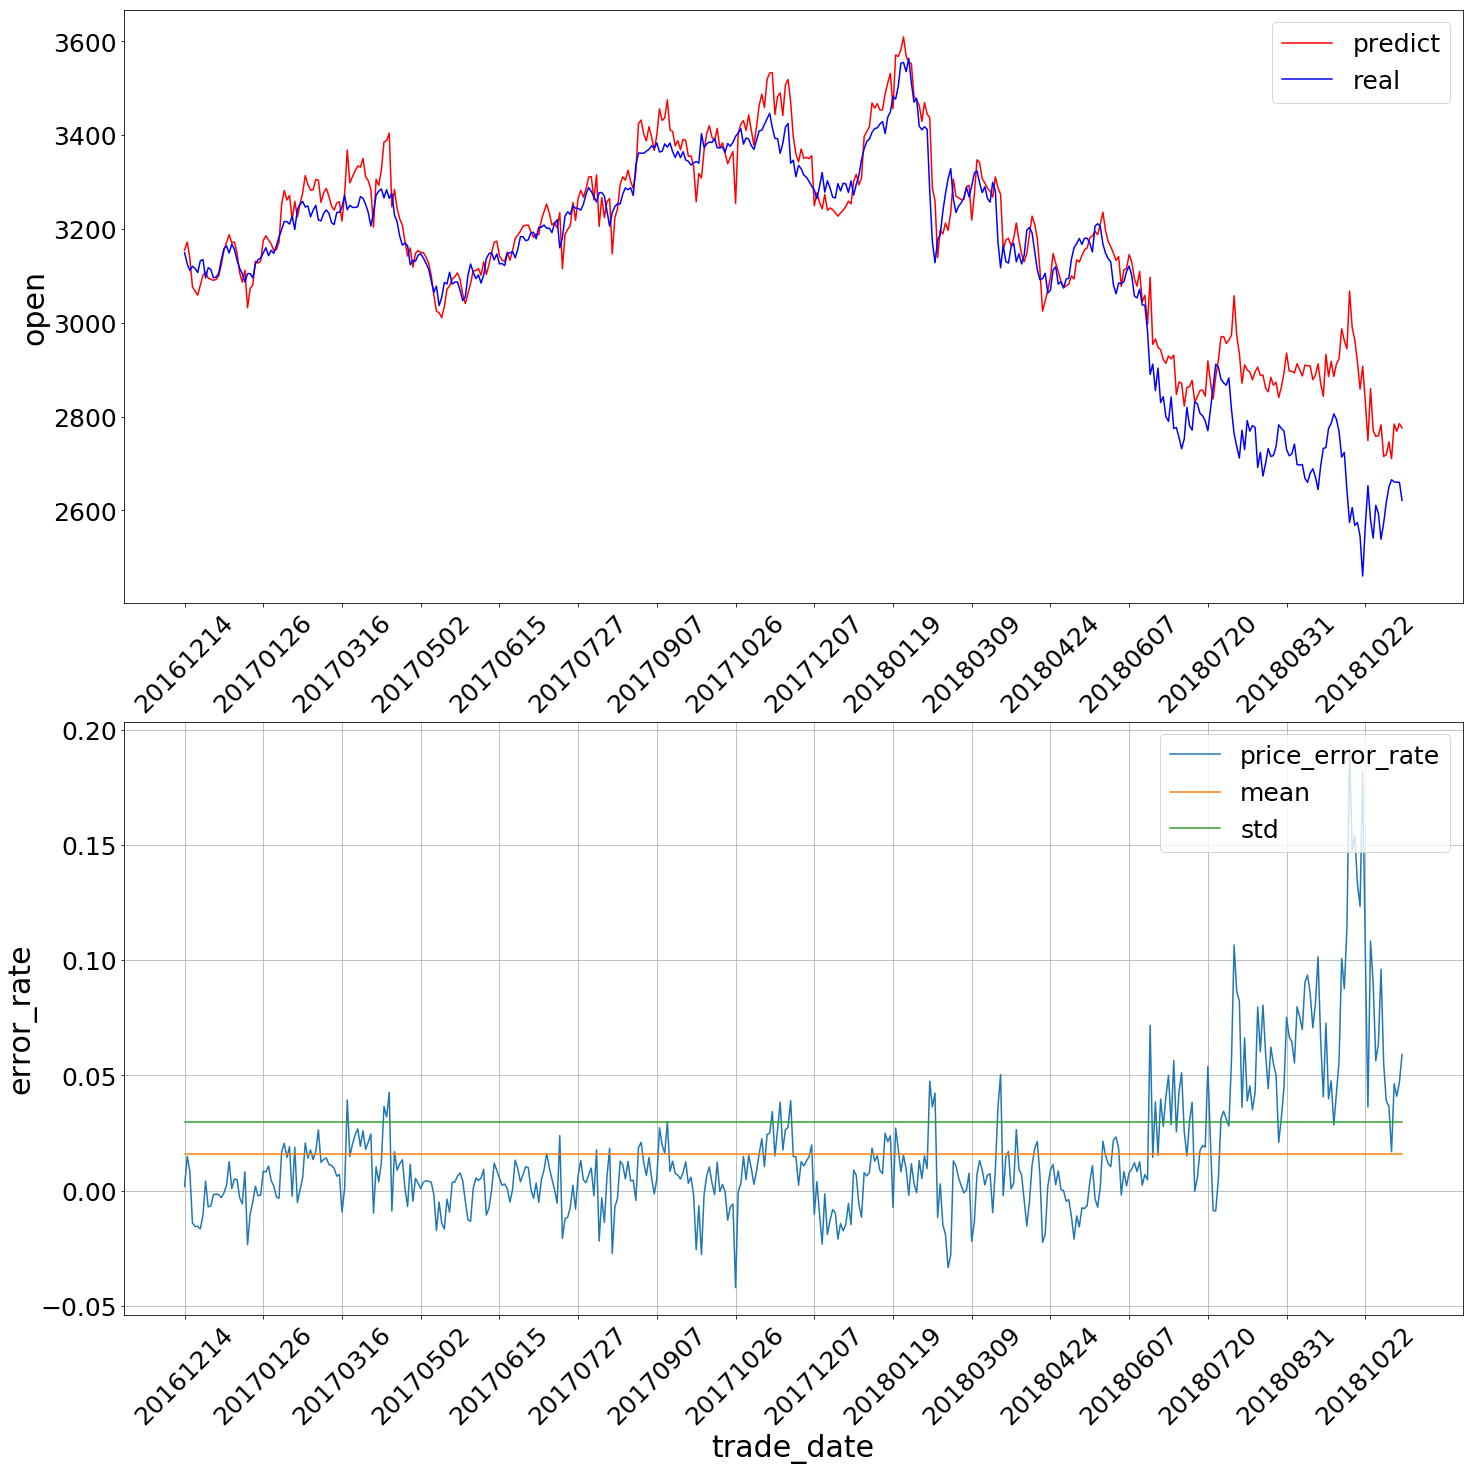

In [18]:
with tf.variable_scope('my',reuse=tf.AUTO_REUSE):  
    #train_network()
    pred_network()